<a href="https://colab.research.google.com/github/prashanth-ds-ml/Projects/blob/main/Plant_Disease_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
'''import cv2
import imghdr'''

'import cv2\nimport imghdr'

In [ ]:
data_dir = 'plants_leaves_diseases_ds'

In [ ]:
len(os.listdir('plants_leaves_diseases_ds'))

21

In [ ]:
Image_size = 256
Batch_size = 32
Channels = 3
Epochs = 25

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(
    'plants_leaves_diseases_ds',
    shuffle=True,
    image_size=(Image_size,Image_size),
    batch_size=Batch_size)

Found 27335 files belonging to 21 classes.


In [ ]:
classes = data.class_names
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
len(data)

855

In [ ]:
for image_batch, label_batch in data.take(1) :
    print ( image_batch.shape)
    print (label_batch.numpy( ))

(32, 256, 256, 3)
[11  2 15 16  9 14 18  2 13 18  9 17 11 19 18 11 16 12 16 15  6 18 18 18
 17  1 20  5 17  9  5 18]


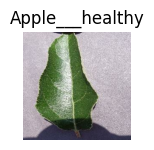

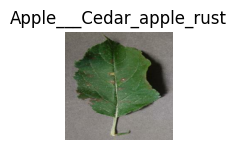

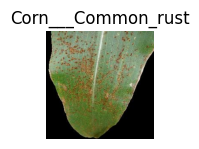

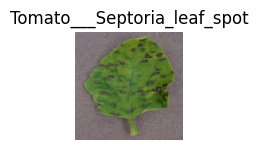

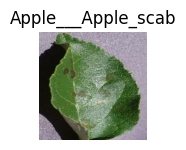

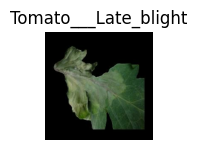

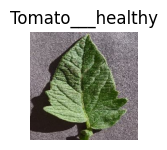

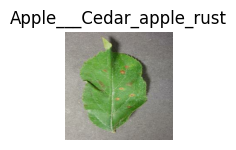

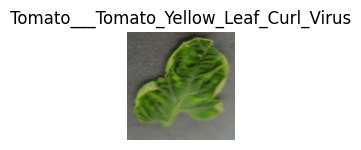

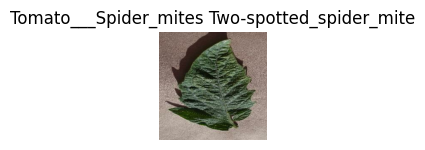

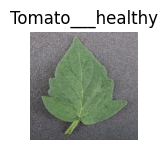

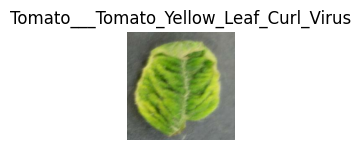

In [ ]:
for image_batch, label_batch in data.take(1):
    for x in range(12):
        ax =plt.subplot(3,4,x+1)
        plt.imshow(image_batch[x].numpy().astype('uint8'))
        plt.title(classes[label_batch[x]])
        plt.axis('off')
        plt.show()

In [ ]:
def get_dataset_partitions_tf (dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle = True,shuffle_size = 10000):
    dataset_size  = len(dataset)

    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)

    train_size= int(train_split * dataset_size)
    validation_size= int(val_split * dataset_size)

    train_ds = dataset.take(train_size)

    validation_ds= dataset.skip(train_size) .take(validation_size)

    test_ds= dataset.skip(train_size) 

    return train_ds, validation_ds, test_ds
    

In [ ]:
train_ds,validation_ds,test_ds = get_dataset_partitions_tf(data)

In [ ]:
len(train_ds)

684

In [ ]:
len(validation_ds)

85

In [ ]:
len(test_ds)

171

In [ ]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds= validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
'''data_augmentation_flip = tf.keras.layers.RandomFlip("horizontal_and_vertical"),
data_augmentation_rotation =tf.keras.layers.RandomRotation(0.2),'''

'data_augmentation_flip = tf.keras.layers.RandomFlip("horizontal_and_vertical"),\ndata_augmentation_rotation =tf.keras.layers.RandomRotation(0.2),'

In [ ]:
'''data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])'''

'data_augmentation = tf.keras.Sequential([\n  layers.RandomFlip("horizontal_and_vertical"),\n  layers.RandomRotation(0.2),\n])'

In [ ]:
'''data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)'''

'data_augmentation = tf.keras.Sequential(\n  [\n    layers.RandomFlip("horizontal",\n                      input_shape=(256,\n                                  256,\n                                  3)),\n    layers.RandomRotation(0.1),\n    layers.RandomZoom(0.1),\n  ]\n)'

In [ ]:
'''plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")'''

'plt.figure(figsize=(10, 10))\nfor images, _ in train_ds.take(1):\n  for i in range(9):\n    augmented_images = data_augmentation(images)\n    ax = plt.subplot(3, 3, i + 1)\n    plt.imshow(augmented_images[0].numpy().astype("uint8"))\n    plt.axis("off")'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
num_classes = 21
input_shape =(Batch_size,Image_size,Image_size,Channels)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  
  #data_augmentation,
  
  tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape =(Batch_size,Image_size,Image_size,Channels)),
  tf.keras.layers.MaxPooling2D(pool_size=4,strides=4),
  
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=3,strides=3),
  
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2,strides=2),
  
  tf.keras.layers.Flatten(),
  
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  
  tf.keras.layers.Dense(num_classes,activation='softmax')
])


model.build(input_shape)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 63, 63, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 61, 61, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 20, 20, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 18, 18, 64)          1

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nReached 97% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
hist = model.fit(train_ds, epochs=Epochs,batch_size = Batch_size,validation_data=validation_ds, callbacks=[callbacks])

Epoch 1/25
684/684 [==============================] - 179s 198ms/step - loss: 1.3478 - accuracy: 0.5824 - val_loss: 0.7670 - val_accuracy: 0.7447
Epoch 2/25
684/684 [==============================] - 84s 122ms/step - loss: 0.6166 - accuracy: 0.7949 - val_loss: 0.3962 - val_accuracy: 0.8627
Epoch 3/25
684/684 [==============================] - 74s 109ms/step - loss: 0.3863 - accuracy: 0.8697 - val_loss: 0.3968 - val_accuracy: 0.8709
Epoch 4/25
684/684 [==============================] - 78s 113ms/step - loss: 0.2643 - accuracy: 0.9125 - val_loss: 0.1780 - val_accuracy: 0.9488
Epoch 5/25
684/684 [==============================] - 95s 139ms/step - loss: 0.1863 - accuracy: 0.9383 - val_loss: 0.1409 - val_accuracy: 0.9544
Epoch 6/25
684/684 [==============================] - 111s 162ms/step - loss: 0.1409 - accuracy: 0.9534 - val_loss: 0.1619 - val_accuracy: 0.9521
Epoch 7/25
684/684 [==============================] - 112s 163ms/step - loss: 0.1296 - accuracy: 0.9580 - val_loss: 0.1329 - val

In [ ]:
accuracy = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

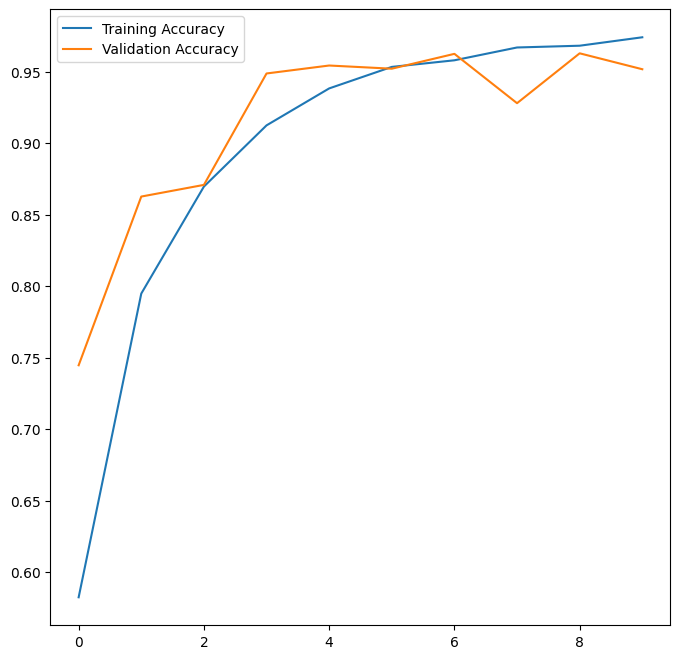

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(accuracy,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.legend(loc="upper left")
plt.show()



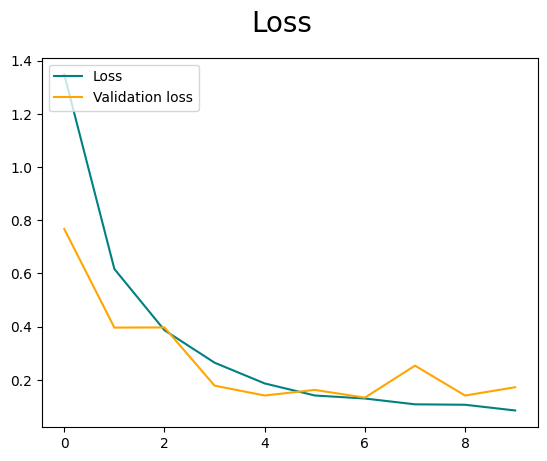

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='Loss')
plt.plot(hist.history['val_loss'], color='orange', label='Validation loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
scores = model.evaluate(test_ds)

171/171 [==============================] - 186s 57ms/step - loss: 0.1599 - accuracy: 0.9561


first image to predict
actual label:  Corn___Northern_Leaf_Blight
1/1 [==============================] - 1s 554ms/step
predicted label:  Corn___Northern_Leaf_Blight


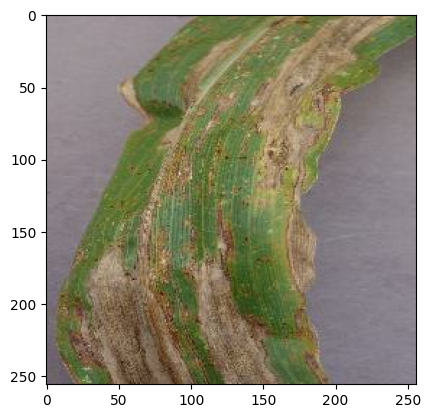

In [ ]:
for images_batch,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print('actual label: ',classes[first_label])
    
    batch_prediction = model.predict(images_batch)
    print('predicted label: ',classes[np.argmax(batch_prediction[0])])
    

In [ ]:
def predict(model, img) :
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0 ) # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class= classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class,confidence
1

1

1/1 [==============================] - 0s 18ms/step


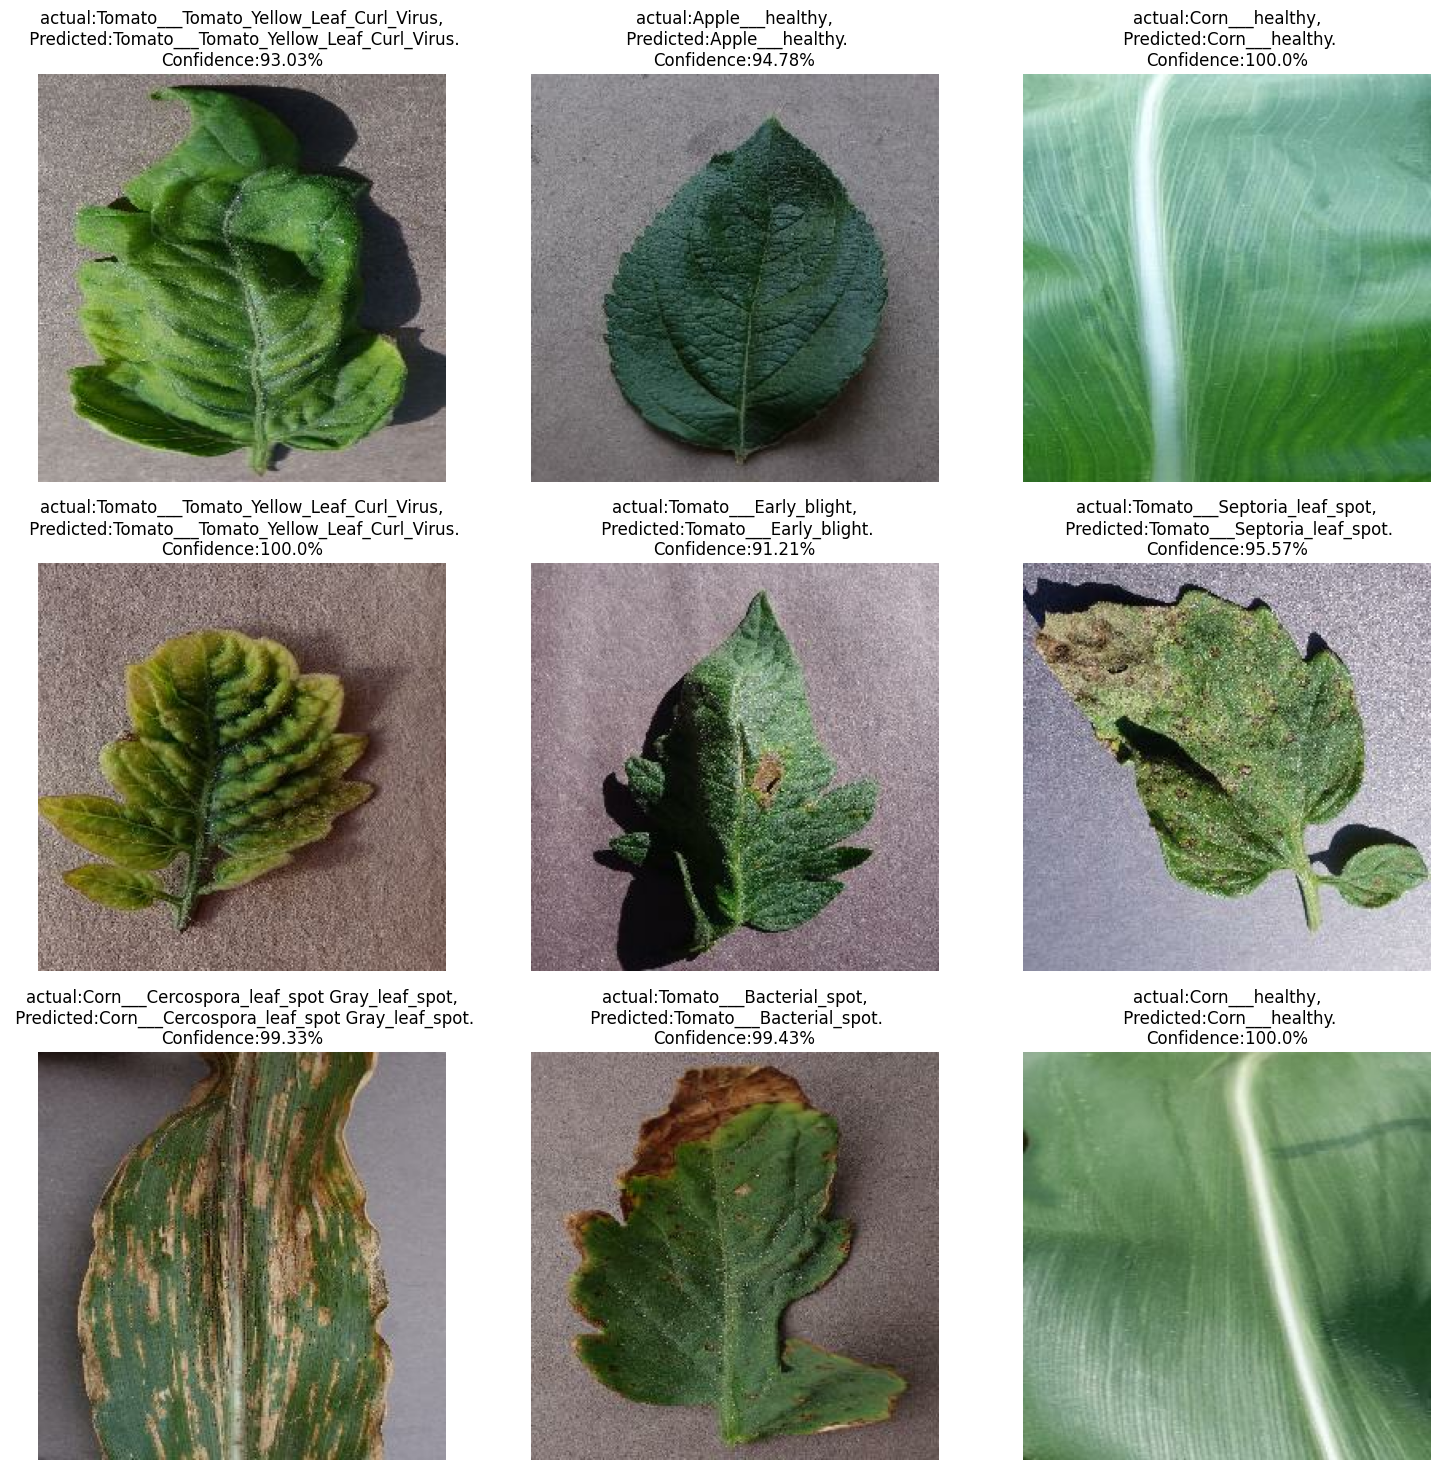

In [ ]:
plt.figure(figsize=(18,18))

for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = classes[labels[i]]
        
        plt.title(f'actual:{actual_class},\n Predicted:{predicted_class}.\nConfidence:{confidence}%')
        
        plt.axis('off')